#### ML Sklearn 과제
#### [데이터]
- 데이터 : ab_data.csv
#### [구현]
1. KNN기반 모델링 - 분류
    - 최적의 K 찾기

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

📌 데이터 준비

In [3]:
abDF = pd.read_csv('ab_data.csv')
abDF.head(3)

,Weight,Length,Species
0,242,25.4,A
1,290,26.3,A
2,340,26.5,A


In [4]:
abDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   55 non-null     int64  
 1   Length   55 non-null     float64
 2   Species  55 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


📌 데이터 전처리

In [7]:
# 특성 데이터의 범위 확인
abDF.describe().T[['min', 'max']]

,min,max
Weight,0.0,1000.0
Length,14.1,41.0


In [8]:
abDF.describe().T['max'] - abDF.describe().T['min']

Weight    1000.0
Length      26.9
dtype: float64

In [10]:
# 수치형 특성 데이터 스케일링
st = StandardScaler()
st_data = st.fit_transform(abDF[abDF.columns[:-1]])

In [12]:
st_data.shape

(55, 2)

In [13]:
# 데이터, 타겟 분리
data = abDF[abDF.columns[:-1]]
target = abDF[abDF.columns[-1]]

In [14]:
data.shape, target.shape

((55, 2), (55,))

📌 학습용, 테스트용 데이터 준비

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 11)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(41, 14, 41, 14)

📌 학습 모델 객체 생성 및 학습

In [6]:
# KNN 학습 모델 객체 생성
knn = KNeighborsClassifier()

In [18]:
scores = []

for n in range(1, X_train.shape[0]):
    knn.n_neighbors = n
    knn.fit(X_train, y_train)
    sc = knn.score(X_train, y_train)
    print(f'[{n}] : score : {sc}')
    scores.append(sc)

[1] : score : 1.0
[2] : score : 0.9512195121951219
[3] : score : 0.9512195121951219
[4] : score : 0.9512195121951219
[5] : score : 0.926829268292683
[6] : score : 0.926829268292683
[7] : score : 0.926829268292683
[8] : score : 0.926829268292683
[9] : score : 0.926829268292683
[10] : score : 0.926829268292683
[11] : score : 0.926829268292683
[12] : score : 0.926829268292683
[13] : score : 0.926829268292683
[14] : score : 0.926829268292683
[15] : score : 0.926829268292683
[16] : score : 0.926829268292683
[17] : score : 0.926829268292683
[18] : score : 0.926829268292683
[19] : score : 0.926829268292683
[20] : score : 0.926829268292683
[21] : score : 0.926829268292683
[22] : score : 0.926829268292683
[23] : score : 0.926829268292683
[24] : score : 0.926829268292683
[25] : score : 0.926829268292683
[26] : score : 0.6829268292682927
[27] : score : 0.6829268292682927
[28] : score : 0.6829268292682927
[29] : score : 0.6829268292682927
[30] : score : 0.6829268292682927
[31] : score : 0.68292682

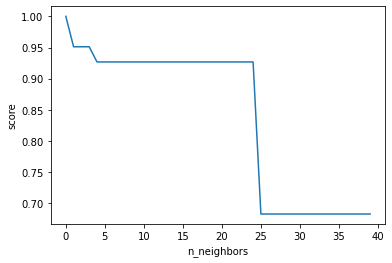

In [19]:
plt.plot(scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
model = KNeighborsClassifier()
params = {'n_neighbors':[2, 3, 4], 'p':[1, 2], 'weights':['uniform', 'distance']}

grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv = 3)

In [22]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
grid.cv_results_

{'mean_fit_time': array([0.00300288, 0.00233539, 0.00200216, 0.00233571, 0.00166821,
        0.00300209, 0.00200192, 0.002002  , 0.00200176, 0.00100128,
        0.00166814, 0.00166845]),
 'std_fit_time': array([1.94667955e-07, 4.71988518e-04, 2.97360213e-07, 4.71763815e-04,
        4.71876126e-04, 8.17313410e-04, 6.83651389e-07, 1.94667955e-07,
        1.94667955e-07, 4.05233662e-07, 4.72157135e-04, 4.71707689e-04]),
 'mean_score_time': array([0.00266886, 0.004004  , 0.0026687 , 0.00166798, 0.002002  ,
        0.0023361 , 0.00266862, 0.0010008 , 0.00100088, 0.00133419,
        0.00133443, 0.00100064]),
 'std_score_time': array([4.71876126e-04, 2.83125670e-03, 4.72269848e-04, 4.71707529e-04,
        3.89335909e-07, 4.71482745e-04, 4.72550556e-04, 4.05233662e-07,
        3.37174788e-07, 4.71707569e-04, 4.72044743e-04, 3.37174788e-07]),
 'param_n_neighbors': masked_array(data=[2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4],
              mask=[False, False, False, False, False, False, False, False,


In [24]:
grid.best_params_, grid.best_score_

({'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}, 0.9505494505494506)

In [25]:
model = grid.best_estimator_